Kaggle Competition 

In [1]:
import json
import os
import logging

from datetime import datetime
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, GroupKFold
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance,PartialDependenceDisplay
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit, cross_validate, train_test_split
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline, make_union
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
import xgboost as xgb
import seaborn as sns
import redshift_connector
from dotenv import load_dotenv
import os

np.random.seed(1)
logging.basicConfig(level=logging.INFO)

In [3]:
house_price_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')


In [6]:
print("data shape:", house_price_data.shape)

data shape: (1460, 81)


In [ ]:
print("data overview:", house_price_data.describe())
#lots of numerical features that aren't actually numeric | watch out here with EDA.  

data overview:                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207  

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

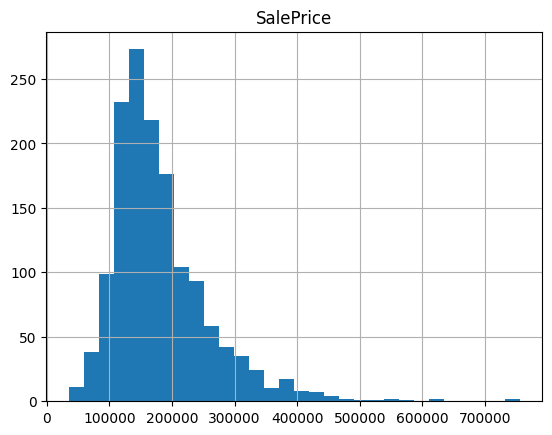

In [ ]:
house_price_data.hist(column='SalePrice', bins=30)
#needs a log transformation given current distribution of target variable.